In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading Data
data = pd.read_csv('Theta.csv')
data.head()

,Goal Levels,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5ace20379fe7b01d5806bec9,-0.30,-0.30,-1.53,-2.27,-1.98,-1.57,-1.26,-1.00,-1.08,-1.12,-1.24,-1.29,-1.31,-1.35,-1.37
1,5ace20379fe7b01d5806bebb,1.23,0.91,-0.51,-0.77,-1.49,-1.99,-2.19,-2.24,-2.31,-2.41,-2.38,-2.38,-2.37,-2.39,-2.41
2,5ace203f9fe7b01d5806c144,-0.05,0.26,-0.22,-0.62,-1.05,-0.82,-1.12,-1.29,-1.29,-1.58,-1.75,-1.88,-1.96,-2.02,-2.05
3,5ace203f9fe7b01d5806c145,-0.05,1.45,0.24,0.89,0.81,0.51,0.22,0.03,0.02,-0.19,-0.39,-0.55,-0.64,-0.70,-0.72
4,5ace20349fe7b01d5806bdcc,NaN,2.67,0.55,1.05,1.20,1.01,0.48,0.71,0.66,0.40,0.28,0.21,0.21,0.19,0.19


In [ ]:
#Copying data
df = data.copy()

In [ ]:
df.shape

(648, 16)

In [ ]:
#Checking null values if any
df.isnull().sum()

Goal Levels     0
x1             95
x2             27
x3             12
x4              4
x5              2
x6              1
x7              1
x8              0
x9              0
x10             0
x11             0
x12             0
x13             0
x14             0
x15             0
dtype: int64

In [ ]:
#We have 15% null values, dropping them
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 0 to 647
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Goal Levels  550 non-null    object 
 1   x1           550 non-null    float64
 2   x2           550 non-null    float64
 3   x3           550 non-null    float64
 4   x4           550 non-null    float64
 5   x5           550 non-null    float64
 6   x6           550 non-null    float64
 7   x7           550 non-null    float64
 8   x8           550 non-null    float64
 9   x9           550 non-null    float64
 10  x10          550 non-null    float64
 11  x11          550 non-null    float64
 12  x12          550 non-null    float64
 13  x13          550 non-null    float64
 14  x14          550 non-null    float64
 15  x15          550 non-null    float64
dtypes: float64(15), object(1)
memory usage: 73.0+ KB


In [ ]:
df.iloc[1,1:]

x1     1.23
x2     0.91
x3    -0.51
x4    -0.77
x5    -1.49
x6    -1.99
x7    -2.19
x8    -2.24
x9    -2.31
x10   -2.41
x11   -2.38
x12   -2.38
x13   -2.37
x14   -2.39
x15   -2.41
Name: 1, dtype: object

In [ ]:
#Checking anamolies if any...(If difference positive, it will show values of indices of anamolies)
for i in range(len(df)):
    d = df.iloc[i,1:]
    d1 = np.diff(d) 
    idx = (np.where( d1>0 )[0])    #gives index number of d1>0 
    print(idx)

[3 4 5 6]
[ 9 11]
[0 4]
[0 2]
[ 2  4  7  9 10 11 12]
[0 1 2]
[0 1 2 3 5]
[ 2  3  4  9 13]
[ 2 13]
[2 6 8]
[ 1  4  6  8  9 10 11]
[0 2 3 4]
[2]
[2 4]
[0 2 4 5]
[2 4 7]
[4 8]
[3 4]
[]
[2 4 9]
[]
[0 2 4]
[2]
[0 2 3]
[2 3 4]
[1 2 5]
[0]
[1 2 3 4]
[1 2 4]
[2]
[1 2 4]
[2 4]
[ 4  6 12]
[0 1 2 4 7 8]
[4 6 7]
[ 2  3  7  8  9 10]
[0 2]
[1 4]
[0 1 6 8]
[1 5 6 7 8]
[0 2]
[0 2 3 4 7]
[2]
[4]
[3 4]
[2 4 5 7]
[3]
[2 3 4 5]
[2]
[2 8]
[2 5]
[2 3]
[0 2 3 5 6 7]
[2]
[1 2 3 5]
[0 6]
[ 1  2 12]
[3 4]
[3]
[4]
[1 2 3 4]
[2 3 4]
[0 2]
[0 1 2 4 6 7]
[1 7]
[ 0  1  2 10]
[ 0  2  3  5  7  8 11]
[0 3 4]
[1]
[4 6]
[0 2 3 7]
[2 4 5]
[2 4]
[ 2  4  5  7  8 11 12]
[ 0  9 10]
[3]
[2 3 4 6]
[ 0  2  7 10 11 12]
[2 3 4 7]
[0 1 2 4 6 7]
[0 7]
[5]
[2]
[2 3 5]
[1 6 7]
[2 4]
[ 4  5  8  9 10 11]
[0 1 5 8]
[1 7]
[2 4]
[ 1  2  3  5  8  9 12]
[2]
[2]
[4 5 7 8]
[1 2]
[1 3 4 5]
[0 2]
[0 2 4 5 7]
[0 1 3 4 7]
[]
[1 2 3 4]
[0 1 2 3]
[2 3 4]
[ 0  1  2  4  8  9 10]
[1 2]
[3 4]
[2 4]
[0 2 5]
[]
[1 2]
[2 3 4]
[2]
[1 2 6]
[0 3]
[2 4]
[1 3 4

[-4.0 -4.0 -1.92 -2.56 -2.89 -2.63 -2.65 -2.58 -2.6 -2.59 -2.44 -2.39
 -2.34 -2.35 -2.38]


(-4.0, 4.0)

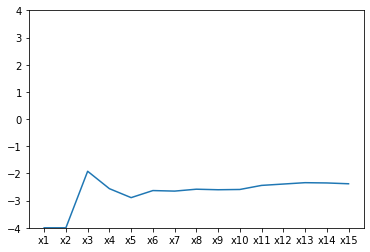

In [ ]:
#Plotting a row
l = df.iloc[10,1:]
print(l.values)
plt.plot(l)
plt.ylim(-4,4)

In [ ]:
def smooth_curve(l):
    '''Successive differences in l(row) are taken of values in d1.
    While loop will run until the differences between observations is >0.
    If number is less than its succisive number,1st if will increase it with some increment.
    '''
    
    d1 = np.diff(l.values)
    j = 0
    while any(d1 > 0) :
        
        for i in range(len(l)):
            
            if i == len(l)-1:     #just for avoiding index out of bound error
                  pass
            elif l[i] <= l[i+1]:
                  l[i] = l[i+1] + 0.01       
            else:
                pass
            
            if l[i] >= 4:    #lower and upper bound are (-4,4).If value is greater than 4, 2nd if  will replace it by 4
                l[i] = 4
            else:
                pass
                
        d1 = np.diff(l.values)   #Checking successive differences
        j+=1

        
                    
    return l

In [ ]:
#Dummy row
l = pd.Series([5.4,4.5,3,2,1,3,-2,-1.6,0])

[ 5.4  4.5  3.   2.   1.   3.  -2.  -1.6  0. ]


(-4.0, 4.0)

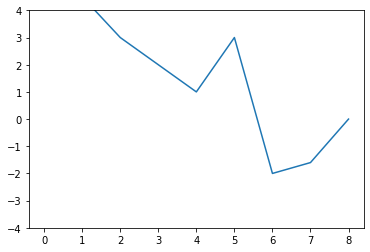

In [ ]:
#Plotting dummy row 
#l = df.iloc[346,1:]
print(l.values)
plt.plot(l)
plt.ylim(-4,4)

In [ ]:
d1 = np.diff(l.values)
d1
any(d1> 0)   # difference is greater than 0

True

[4.   4.   3.03 3.02 3.01 3.   0.02 0.01 0.  ]


(-4.0, 4.0)

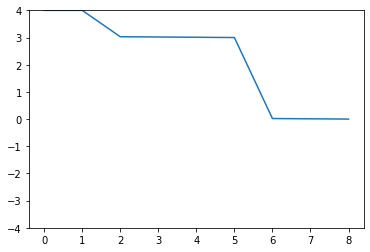

In [ ]:
#Plotting dummy row after applying smooth curve
l = smooth_curve(l)
print(l.values)
plt.plot(l)
plt.ylim(-4,4) 

In [ ]:
d1 = np.diff(l.values)
d1
any(d1> 0)   # difference is not greater than 0

False

In [ ]:
#Appending values after removing anamolies for data
df2 = df.copy()
d1 = []
for i in range(len(df)):
    d1.append(smooth_curve(df.iloc[i,1:]))
    df2.iloc[i,1:] = d1[i].values

In [ ]:
#Checking anamolies if any...(If difference positive, it will show values of anamolies)
for i in range(len(df2)):
    d = df2.iloc[i,1:]
    d1 = np.diff(d) 
    idx = (np.where( d1>0 )[0])
    print(idx)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

In [ ]:
df2.head()

,Goal Levels,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5ace20379fe7b01d5806bec9,-0.29,-0.30,-0.95,-0.96,-0.97,-0.98,-0.99,-1.00,-1.08,-1.12,-1.24,-1.29,-1.31,-1.35,-1.37
1,5ace20379fe7b01d5806bebb,1.23,0.91,-0.51,-0.77,-1.49,-1.99,-2.19,-2.24,-2.31,-2.34,-2.35,-2.36,-2.37,-2.39,-2.41
2,5ace203f9fe7b01d5806c144,0.27,0.26,-0.22,-0.62,-0.81,-0.82,-1.12,-1.28,-1.29,-1.58,-1.75,-1.88,-1.96,-2.02,-2.05
3,5ace203f9fe7b01d5806c145,1.46,1.45,0.90,0.89,0.81,0.51,0.22,0.03,0.02,-0.19,-0.39,-0.55,-0.64,-0.70,-0.72
7,5ace203d9fe7b01d5806c082,3.85,2.27,-0.30,-0.30,-0.31,-0.32,-0.33,-0.34,-0.35,-0.36,-0.37,-0.38,-0.39,-0.40,-0.41


In [ ]:
#Saving updated dataframe to csv
smooth_data = 'Updated_theta.csv'
df2.to_csv(smooth_data, index = None)

In [ ]:
import os
os.getcwd()

'C:\\Users\\jaych\\Downloads\\iAnalyst\\IRT'

In [ ]:
def rand_plot(df): 
    '''A function to plot any random 10 rows from Dataframe '''
    rdm = np.random.randint(0,len(df),10)
    plt.figure(figsize =(12,8))
    for i in range(len(rdm)):
        l1 = df.iloc[rdm[i],1:]
        label = df.iloc[rdm[i],0]
        plt.plot(l1,label = label)
        plt.xlabel('Rows')
        plt.ylabel('Abilities')
        plt.title('Random 10 rows Plot')
        plt.legend()  

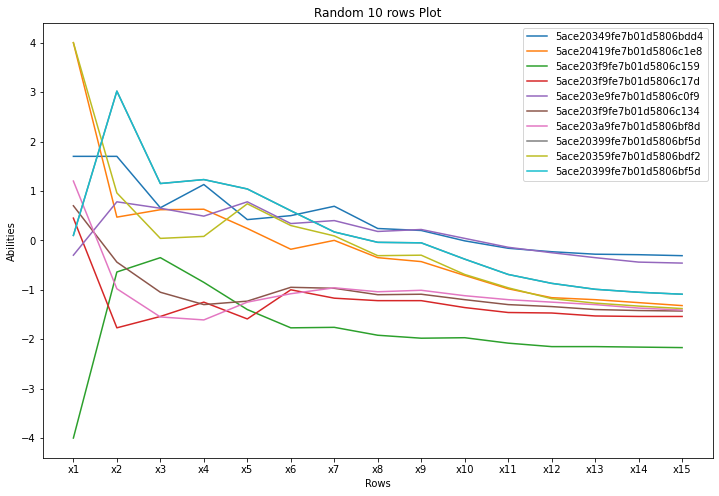

In [ ]:
rand_plot(df)

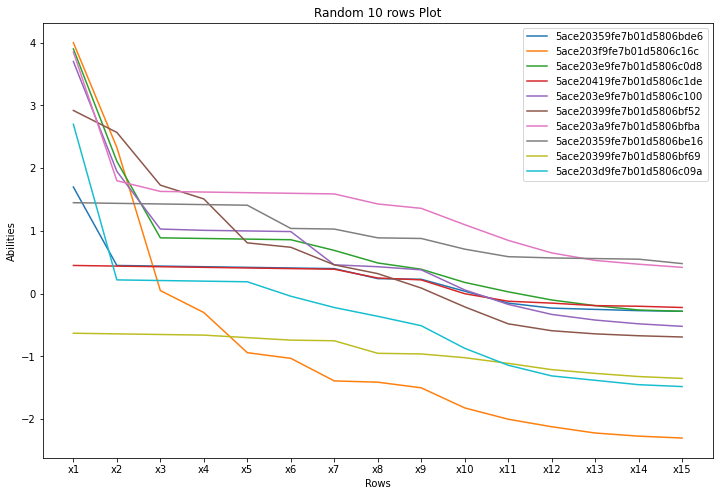

In [ ]:
rand_plot(df2)